In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import sys
import os
import shutil
import gc
import numpy as np
import scipy.integrate as it
import subprocess as sub
import matplotlib.pyplot as plt
import linecache as l
import pandas as pd
from scipy import signal
from scipy.optimize import curve_fit
from scipy import fftpack

In [3]:
#irun = 2
pot = 1
prodrun=5000000
dt=1.0
A=1890

result="./NEMD_RESULTS"

In [4]:
def CalcCentreBins(lmin,lmax,slab):
    z=z=np.linspace(lmin,lmax,num=slab)
    lz=np.size(z)
    z_centre=np.zeros(lz-1)
    for i in range (lz-1):
        z_centre[i]=0.5*(z[i+1]+z[i])
    return z_centre

In [5]:
def cutXT(x_left, T_graL, x_mid, Tw, x_right, T_graR):
    n=np.size(x_left)
    #print(x_left)
    x_left=np.delete(x_left, [0,1,2,3,4,5,6,7,8], axis=0)
    #x_left=x_left[0:7]
    #x_left=x_left[6]
    #print(x_left)
    n=np.size(x_right)
    x_right=np.delete(x_right, [n-1,n-2,n-3,n-4,n-5,n-6,n-7,n-8,n-9], axis=0)
    #x_right=x_right[0]
    n=np.size(x_mid)
    x_mid=np.delete(x_mid,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,n-51,n-50,n-49,n-48,n-47,n-46,n-45,n-44,n-43,n-42,n-41,n-40,n-39,n-38,n-37,n-36,n-35,n-34,n-33,n-32,n-31,n-30,n-29,n-28,n-27,n-26,n-25,n-24,n-23,n-22,n-21,n-20,n-19,n-18,n-17,n-16,n-15,n-14,n-13,n-12,n-11,n-10,n-9,n-8,n-7,n-6,n-5,n-4,n-3,n-2,n-1])
    n=np.size(T_graL)
    T_graL=np.delete(T_graL, [0,1,2,3,4,5,6,7,8], axis=0)
    #T_graL=T_graL[0:7]
    #print(T_graL)
    #T_graL=T_graL[6]
    #print(T_graL)
    n=np.size(T_graR)
    T_graR=np.delete(T_graR, [n-1,n-2,n-3,n-4,n-5,n-6,n-7,n-8,n-9], axis=0)
    #T_graR=T_graR[0]
    #print(T_graL,T_graR)
    n=np.size(Tw)
    Tw=np.delete(Tw,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,n-51,n-50,n-49,n-48,n-47,n-46,n-45,n-44,n-43,n-42,n-41,n-40,n-39,n-38,n-37,n-36,n-35,n-34,n-33,n-32,n-31,n-30,n-29,n-28,n-27,n-26,n-25,n-24,n-23,n-22,n-21,n-20,n-19,n-18,n-17,n-16,n-15,n-14,n-13,n-12,n-11,n-10,n-9,n-8,n-7,n-6,n-5,n-4,n-3,n-2,n-1])
    #print(x_left, T_graL, x_mid, Tw, x_right, T_graR)
    return x_left, T_graL, x_mid, Tw, x_right, T_graR


In [6]:
def cutXT2(x_left, T_graL, x_mid, Tw, x_right, T_graR):
    n=np.size(x_left)
    #print(x_left)
    x_left=np.delete(x_left, [0,1,2], axis=0)
    x_left=x_left[0:7]
    n=np.size(x_right)
    x_right=np.delete(x_right, [n-1,n-2,n-3], axis=0)
    n=np.size(x_mid)
    x_mid=np.delete(x_mid,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,n-51,n-50,n-49,n-48,n-47,n-46,n-45,n-44,n-43,n-42,n-41,n-40,n-39,n-38,n-37,n-36,n-35,n-34,n-33,n-32,n-31,n-30,n-29,n-28,n-27,n-26,n-25,n-24,n-23,n-22,n-21,n-20,n-19,n-18,n-17,n-16,n-15,n-14,n-13,n-12,n-11,n-10,n-9,n-8,n-7,n-6,n-5,n-4,n-3,n-2,n-1])
    n=np.size(T_graL)
    T_graL=np.delete(T_graL, [0,1,2], axis=0)
    T_graL=T_graL[0:7]
    n=np.size(T_graR)
    T_graR=np.delete(T_graR, [n-1,n-2,n-3], axis=0)
    n=np.size(Tw)
    Tw=np.delete(Tw,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,n-51,n-50,n-49,n-48,n-47,n-46,n-45,n-44,n-43,n-42,n-41,n-40,n-39,n-38,n-37,n-36,n-35,n-34,n-33,n-32,n-31,n-30,n-29,n-28,n-27,n-26,n-25,n-24,n-23,n-22,n-21,n-20,n-19,n-18,n-17,n-16,n-15,n-14,n-13,n-12,n-11,n-10,n-9,n-8,n-7,n-6,n-5,n-4,n-3,n-2,n-1])
    #print(x_left, T_graL, x_mid, Tw, x_right, T_graR)
    return x_left, T_graL, x_mid, Tw, x_right, T_graR

In [7]:
def SmoothGrad(x_left, T_graL, x_mid, Tw, x_right, T_graR,x_leftfull,x_midfull,x_rightfull):
    
    pL=np.poly1d(np.polyfit(x_left,T_graL,1))
    pmid=np.poly1d(np.polyfit(x_mid,Tw,1))
    pR=np.poly1d(np.polyfit(x_right,T_graR,1))

    #x=np.concatenate([x_left,x_mid,x_right],axis=0)
    #p=np.concatenate([pL(x_left),pmid(x_mid),pR(x_right)],axis=0)
    L=np.column_stack((x_left,pL(x_left)))
    Lfull=np.column_stack((x_leftfull,pL(x_leftfull)))
    M=np.column_stack((x_mid,pmid(x_mid)))
    Mfull=np.column_stack((x_midfull,pmid(x_midfull)))
    R=np.column_stack((x_right,pR(x_right)))
    Rfull=np.column_stack((x_rightfull,pR(x_rightfull)))
    return L,M,R,Lfull,Mfull,Rfull

In [8]:
def calcThermal(x_left, T_graL, x_mid, Tw, x_right, T_graR,Q_flux):
    slope_TgraL, c_TgraL=np.polyfit(x_left,T_graL,1)
    slope_Tw, c_Tw=np.polyfit(x_mid,Tw,1)
    slope_TgraR, c_TgraR=np.polyfit(x_right,T_graR,1)
    
    k_graL=-(Q_flux/(slope_TgraL))    #W/mK
    k_W=-(Q_flux/(slope_Tw))
    k_graR=-(Q_flux/(slope_TgraR))

    x_intL=-wall
    x_intLw=-wall
    x_intR=wall
    x_intRw=wall

    Tint_lGra=slope_TgraL*x_intL+c_TgraL
    Tint_lWat=slope_Tw*x_intLw+c_Tw
    Tint_rWat=slope_Tw*x_intRw+c_Tw
    Tint_rGra=slope_TgraR*x_intR+c_TgraR
    delTL= Tint_lGra-Tint_lWat
    delTR=Tint_rWat-Tint_rGra
    G_L=((Tint_lGra-Tint_lWat))/Q_flux    #m2K/W
    G_R=((Tint_rWat-Tint_rGra))/Q_flux
    print("Temperature drop left  =",delTL,'K')
    print("Temperature drop right  =",delTR,'K')
    return k_graL,k_W,k_graR,G_L,G_R 

In [9]:
def avedata(file_name):
    VAL = np.loadtxt(file_name, dtype = float,skiprows=3,max_rows=1)
    maxrows = int(VAL[1])
    a = 4
    bindat = np.loadtxt(file_name, dtype = float,skiprows=a,max_rows=int(maxrows))[:,[0,1,2]]
    sum_dat =[]
    for i in range(5):
        VAL1 = np.loadtxt(file_name, dtype = float,skiprows=a,max_rows=int(maxrows))[:,3].reshape(maxrows,1)
        sum_dat.append(VAL1)
        a += maxrows+1
    #print(sum_dat)
    ave_dat = sum_dat[4]
    #print(ave_dat)
    bindat=np.append(bindat, ave_dat, axis=1)
    return bindat

100 350 1 100
20435.7570545626 13643.5901363088
-1.8031400630090687e-06
100 350 4 100
18345.0351006831 16035.4084038341
-1.81907108489509e-06
100 350 5 100
17564.8584660907 15700.7136797067
-1.7600831823173228e-06
[304.12  302.856 302.596 302.823 304.518 303.837 304.55 ] [387.811 390.459 390.396 389.09  391.112 393.79  393.377]
Temperature drop left  = -8.92931011520568 K
Temperature drop right  = -9.210906932674504 K
########## 350 1 #########################
Conductivity left  = 2.2103037790476323 W/mK
Conductivity right = 0.475000488153821 W/mK
Conductivity Fluid = 0.16237048259047576 W/mK
Conductivity Solid = 1.3426521336007267 W/mK
Kapitza left       = 7.302036741379293e-09 m2K/W
Kapitza length left       = 1.1856352295911408 nm
Kapitza right      = 7.53231548418063e-09 m2K/W
Kapitza length right      = 1.2230257001901221 nm
heatflux    = -1.794098110073827e-06 W/m^2
Kapitza Average    = 7.417176112779962 m2K/GW
Kapitza length Average    = 1.2043304648906314 nm
###################

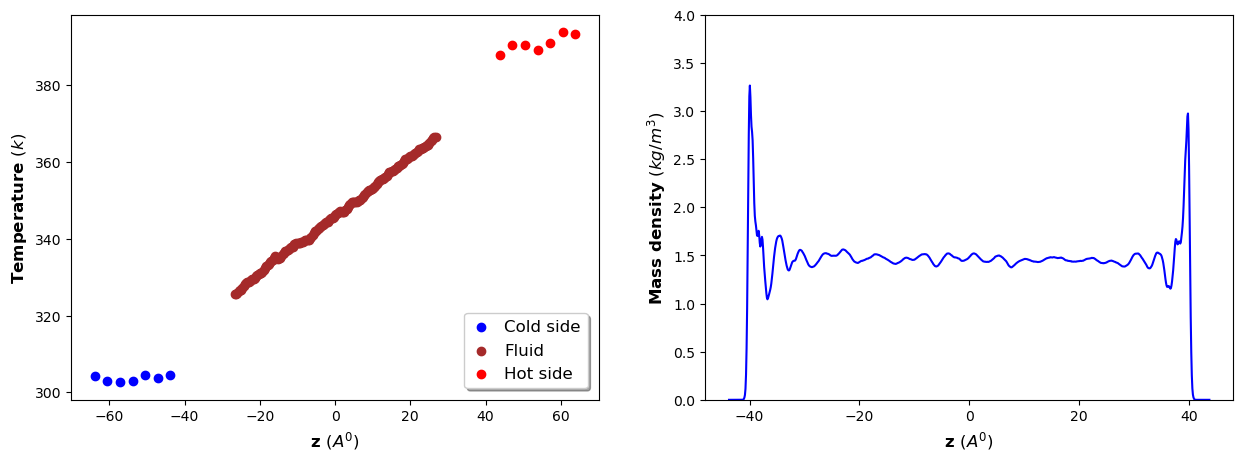

200 350 1 100
22707.9834380948 16055.552123519
-2.050980717545704e-06
200 350 4 100
20065.1057995868 17995.0131716851
-2.0137629085329047e-06
200 350 5 100
20107.3895661504 17727.015832819
-2.0018203914798624e-06
[303.469 304.083 304.265 304.589 304.951 305.1   306.884] [385.572 387.841 387.733 388.416 390.583 392.167 392.476]
Temperature drop left  = -9.587760065680584 K
Temperature drop right  = -8.319690894437827 K
########## 350 1 #########################
Conductivity left  = 1.0032237041424816 W/mK
Conductivity right = 0.40376219420771786 W/mK
Conductivity Fluid = 0.17821929429261232 W/mK
Conductivity Solid = 0.7034929491750997 W/mK
Kapitza left       = 6.893683639917676e-09 m2K/W
Kapitza length left       = 1.2285874333826554 nm
Kapitza right      = 5.981930775828911e-09 m2K/W
Kapitza length right      = 1.0660954813754875 nm
heatflux    = -2.022188005852824e-06 W/m^2
Kapitza Average    = 6.437807207873294 m2K/GW
Kapitza length Average    = 1.1473414573790714 nm
################

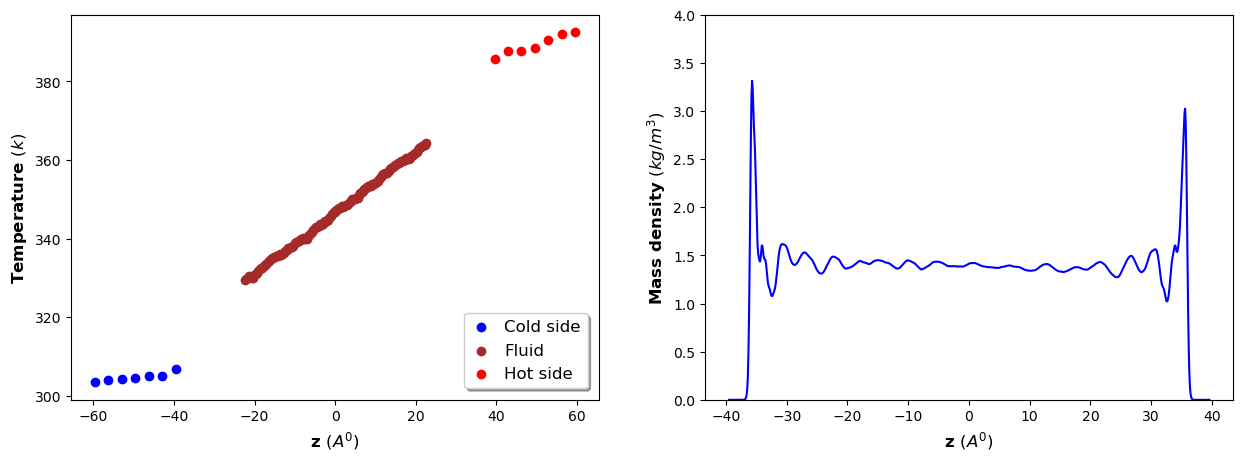

300 350 1 100
25839.4060373403 19177.6079617953
-2.381852592546857e-06
300 350 4 100
24006.922968142 21693.9142801759
-2.4180337168422166e-06
300 350 5 100
23282.1663168993 20760.3602245593
-2.330292409600984e-06
[304.69  304.807 305.388 306.229 306.72  307.579 307.932] [388.254 389.147 389.165 390.495 390.95  391.92  392.13 ]
Temperature drop left  = -10.222398438186246 K
Temperature drop right  = -13.198076014195635 K
########## 350 1 #########################
Conductivity left  = 0.9120007770949411 W/mK
Conductivity right = 0.7986200169487335 W/mK
Conductivity Fluid = 0.1983640743378761 W/mK
Conductivity Solid = 0.8553103970218373 W/mK
Kapitza left       = 6.313957942042499e-09 m2K/W
Kapitza length left       = 1.2524624225815415 nm
Kapitza right      = 8.151912427735178e-09 m2K/W
Kapitza length right      = 1.617046562811117 nm
heatflux    = -2.3767262396633526e-06 W/m^2
Kapitza Average    = 7.232935184888838 m2K/GW
Kapitza length Average    = 1.4347544926963294 nm
################

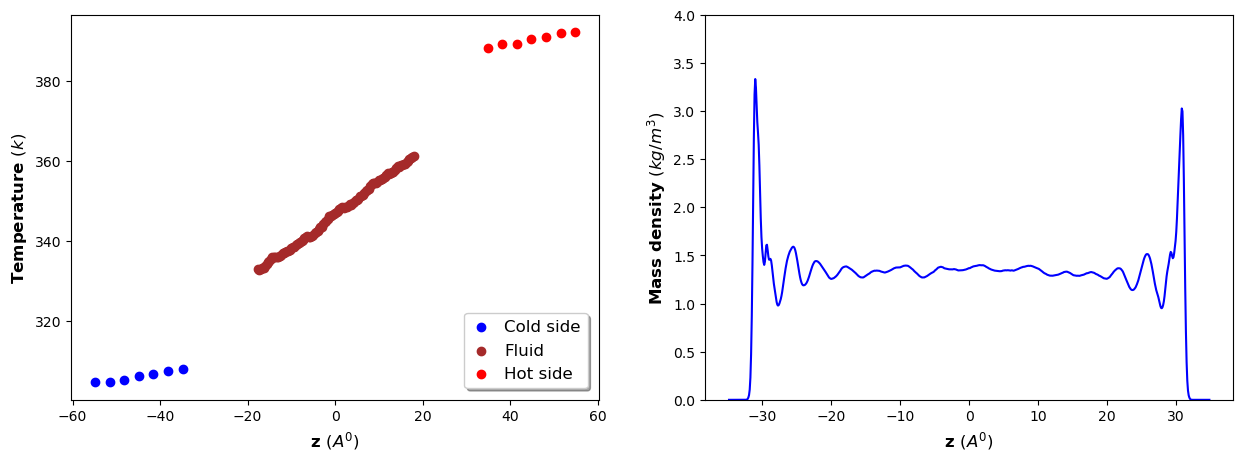

In [10]:
kb=1.987204e-3  #real units
kCal2Joule=4184
avaga=6.02214179e23
fs2s=1.0e-15
A2m =1.0e-10
K_real2SI=A2m*A2m*avaga*fs2s/(kCal2Joule)  #kapitza
K_real2SIcond=kCal2Joule/(avaga*fs2s*A2m)  #conductivity
diranl="./bf_"
conrange= [100,200,300]
trange= [350]
dtrange = [100]
iruns = [1,4,5]
kap=[]
denpeakL=[]
denpeakR=[]
denpeakLz=[]
denpeakRz=[]
Qnet=[]
cf=[]
bulkden=[]
kleft=[]
kright=[]
lk=[]
lkleft=[]
lkright=[]
    #print(Tfluid,Q)
for dT in dtrange:
    for con in conrange:
        Q=[]
        Tfluid=[]
        Tleft=[]
        Tright=[]
        den =[]
        for irun in iruns:
            T=350
            print(con,T,irun,dT)
            heat=np.loadtxt(diranl+str(con)+"/"+str(irun)+'/'+'heatflux.'+str(irun)+"."+str(T)+".dat")
            #heat=np.loadtxt(diranl+str(con)+str(irun)+'/heatfluxfull.'+str(irun)+"."+str(T)+".dat")
           # print(heat[4999][0],heat[3999][0])
            #print(heat[4999][1],heat[3999][1])
            Heat1=np.absolute(heat[0])
            Heat2=np.absolute(heat[1])          
            print(Heat1,Heat2)
            Q_fluxreal=-((Heat1+Heat2)*0.5)/(prodrun*dt*A)
            Q_flux=Q_fluxreal
            print(Q_flux)
            Q.append(Q_flux)
        
            datafluid=avedata(diranl+str(con)+'/'+str(irun)+'/'+'temp_fluid.'+str(irun)+"."+str(T)+".profile")
            tempfluid=datafluid[:,3]
            Tfluid.append(tempfluid)
            
            dataleft=avedata(diranl+str(con)+"/"+str(irun)+'/'+'temp_gnc_left.'+str(irun)+"."+str(T)+".profile")
            templeft=dataleft[:,3]
            Tleft.append(templeft)
            
            dataright=avedata(diranl+str(con)+"/"+str(irun)+'/'+'temp_gnc_right.'+str(irun)+"."+str(T)+".profile")
            tempright=dataright[:,3]
            wall = dataright[:,1][0]
            Tright.append(tempright)
        
            denfluid=avedata(diranl+str(con)+"/"+str(irun)+'/'+'dens_fluid.'+str(irun)+"."+str(T)+".profile")
#datafluid=np.loadtxt(diranl+'tmp_water.profile',skiprows=4)
            density=denfluid[:,3]
            den.append(density)   
#print(Tfluid)
        Qmean= sum(Q)/len(Q)
        tmeanfluid= np.mean(Tfluid, axis = 0)
        tmeanleft=np.mean(Tleft, axis = 0)
        tmeanright=np.mean(Tright, axis = 0)
        denavg = np.mean(den, axis = 0)
    #print(tmeanfluid,tmeanleft,tmeanright)

        zfluid=datafluid[:,1]
        zleft=dataleft[:,1]
        zright=dataright[:,1]
        zden = denfluid[:,1]
        zcord=np.concatenate([zleft,zfluid,zright],axis=0)
        temp=np.concatenate([templeft,tempfluid,tempright],axis=0)
        directory = result
        parent_dir = "bf="+str(con)+"_"+str(dT)+"K_airebo"
        path = os.path.join(directory , parent_dir)
        if os.path.exists(path):
            shutil.rmtree(path)
        os.mkdir(path)
        np.savetxt(path+'/tempGrad.'+"."+str(T)+".dat", np.column_stack((zcord,temp)))
        np.savetxt(path+'/tempGradleft.'+"."+str(T)+".dat", np.column_stack((zleft,templeft)))
        np.savetxt(path+'/tempGradfluid.'+"."+str(T)+".dat", np.column_stack((zfluid,tempfluid)))
        np.savetxt(path+'/tempGradright.'+"."+str(T)+".dat", np.column_stack((zright,tempright)))
        np.savetxt(path+'/dengrad.'+"."+str(T)+".dat", np.column_stack((zden,denavg)))    

###  Trimming edges
        zleft_trim,templeft,zfluid_trim,tempfluid,zright_trim,tempright=cutXT2(zleft,templeft,zfluid,tempfluid,zright,tempright)
        print(templeft,tempright)
###  Smoothening data
        zcord_trim=np.concatenate([zleft_trim,zfluid_trim,zright_trim],axis=0)
        temp_trim=np.concatenate([templeft,tempfluid,tempright],axis=0)
#zmidfull=np.linspace(fluid[0],fluid[1],num=fluid[2])
        left,mid,right,leftfull,midfull,rightfull=SmoothGrad(zleft_trim,templeft,zfluid_trim,tempfluid,zright_trim,tempright,zleft,zfluid,zright)
        np.savetxt(path+'/smoothGradleft.'+str(T)+"."+".dat", leftfull)
        np.savetxt(path+'/smoothGradright.'+str(T)+"."+".dat", rightfull)
        np.savetxt(path+'/smoothGradfluid.'+str(T)+"."+".dat", midfull)

###  Kapitza and conductivity
        C_left,C_fluid,C_right,K_left,K_right=calcThermal(zleft_trim,templeft,zfluid_trim,tempfluid,zright_trim,tempright,Q_flux)
        C_left=C_left*K_real2SIcond
        C_right=C_right*K_real2SIcond
        C_fluid=C_fluid*K_real2SIcond
        K_left=K_left*K_real2SI
        K_right=K_right*K_real2SI
        C_solid=0.5*(C_left+C_right)
        K=0.5*1000000000*(K_left+K_right)
        l_kleft = C_fluid *K_left*1000000000
        l_kright = C_fluid * K_right*1000000000
        l_k = 0.5*(l_kleft+l_kright)
        np.savetxt(path+'/thermalCond.'+"."+str(T)+".dat",np.vstack((C_left,C_fluid,C_right,C_fluid,C_solid)))  
        np.savetxt(path+'/boundaryCond.'+"."+str(T)+".dat", np.vstack((K_left,K_right,K))) 
        print("##########",T,pot,"#########################")
        print("Conductivity left  =",C_left,'W/mK')
        print("Conductivity right =",C_right,'W/mK')
        print("Conductivity Fluid =",C_fluid,'W/mK')
        print("Conductivity Solid =",C_solid,'W/mK')
        print("Kapitza left       =",K_left,'m2K/W')
        print("Kapitza length left       =",l_kleft,'nm')
        print("Kapitza right      =",K_right,'m2K/W')
        print("Kapitza length right      =",l_kright,'nm')
        print("heatflux    =",Qmean,'W/m^2')
        print("Kapitza Average    =",K,'m2K/GW')
        print("Kapitza length Average    =",l_k,'nm')
        kap.append(K)
        kleft.append(K_left)
        kright.append(K_right)
        lk.append(l_k)
        lkleft.append(l_kleft)
        lkright.append(l_kright)
        print("###################################")
        data = pd.read_csv(path+'/dengrad.'+"."+str(T)+".dat",sep='\s+',header=None)
        data = pd.DataFrame(data)
        x = data[0]
        y = data[1]
        bins= int(np.size(y)/5)
        dmaxL=max(y[:bins])
        dmaxR=max(y[-bins:])
        yleft=y[:bins]
        yright=y[-bins:]
        dmaxLz=x[yleft.argmax()]
        dmaxRz=x[bins-int(yright.argmax())]        
        print(dmaxL,dmaxLz,dmaxR,dmaxRz)
        Qnet.append(Qmean)
        denpeakL.append(dmaxL)
        denpeakR.append(dmaxR)
        denpeakLz.append(dmaxLz)
        denpeakRz.append(dmaxRz)
        cf.append(C_fluid)
        z=y[bins:]
        zz=z[:-bins]
        zzz=np.mean(zz)
        bulkden.append(zzz)
     #   plt_1 = plt.figure(figsize=(10, 10))
        figure, axis = plt.subplots(1, 2)
        figure.set_size_inches(15, 5)
        axis[0].scatter(zleft_trim, templeft,color='b',label = 'Cold side')
        axis[0].scatter(zfluid_trim, tempfluid,color='brown',label = 'Fluid')
        axis[0].scatter(zright_trim, tempright,color='r',label = 'Hot side')
        #axis[0].set_title("Temperature profile@"+str(T))
        axis[1].plot(x, y,'b')
        #axis[1].set_title("Density Gradient_"+str(dmaxL))
        axis[0].legend(loc = 'lower right', shadow = True, 
            handlelength = 1.2, fontsize = 'large', borderaxespad = 0.7,ncol=1,frameon=True)
        axis[0].set_xlabel("z $(A^0)$",fontweight = 'bold',fontsize=12)
        axis[1].set_xlabel("z $(A^0)$",fontweight = 'bold',fontsize=12)
        axis[1].set_ylim(0,4)
        axis[0].set_ylabel("Temperature $(k)$",fontweight = 'bold',fontsize=12)
        axis[1].set_ylabel("Mass density $(kg/m^3)$",fontweight = 'bold',fontsize=12)
        extent = axis[0].get_window_extent().transformed(figure.dpi_scale_trans.inverted())
        plt.savefig('temp_pr'+str(dT)+'.'+str(con)+'.png',dpi=600, bbox_inches=extent.expanded(1.25, 1.3))
        extent = axis[1].get_window_extent().transformed(figure.dpi_scale_trans.inverted())
        plt.savefig('dens_pro'+str(dT)+'.'+str(con)+'.png',dpi=600, bbox_inches=extent.expanded(1.25, 1.3))        
        plt.savefig("fig"+str(dT)+'.'+str(con)+'.png')
        plt.show()
        plt.close()
np.savetxt('data1'+".dat", np.column_stack((kap,kleft,kright,denpeakL,denpeakLz,denpeakR,denpeakRz,bulkden,Qnet)),header='Kapitza k_left k_right peak_denL peak_denLz peak_denR peak_denRz bulk_den Qtotal')


In [ ]:
import MDAnalysis
from MDAnalysis.analysis.density import density_from_Universe
from MDAnalysis.analysis.lineardensity import LinearDensity
import numpy as np
from itertools import count

class Smooth_Density(object):
    
    def __init__(self, **kwargs):
        for key,value in kwargs.items():
            setattr(self, key, value)
            
    def density(self, psf, dcd, segid, resname):
        u = MDAnalysis.Universe(psf, dcd)
        mol = u.select_atoms(segid)

        ldens = LinearDensity(mol, grouping ='atoms', binsize=0.5)
        ldens.run()
        D = ldens.results
        x = np.linspace(1,np.size(D['x']['pos']),np.size(D['x']['pos']))
        y = np.linspace(1,np.size(D['y']['pos']),np.size(D['y']['pos']))
        z = np.linspace(1,np.size(D['z']['pos']),np.size(D['z']['pos']))
        return x, D['x']['pos'], y, D['y']['pos'], z, D['z']['pos']

    def density_smooth(self):
        psf_wat = self.wat_input_files_path+folder+'/inputFiles/waterGnc.psf'
        dcd_wat = self.wat_input_files_path+folder+'/outputFiles/waterGnc.dcd'
        
        x, Dx, y, Dy, z, Dz = self.density(psf_wat, dcd_wat, self.wat_segid, self.wat_resname)
        
#         #Saving the density data
#         fname = self.wat_output_files_path+'water_Density_T'+str(T)+'.dat'
#         np.savetxt(fname, np.column_stack((z, Dz)))
        
        axis = self.axis

        if (axis == "x"):
            wat_X = x/self.conv_factor 
            wat_Den = Dx/self.wat_norm
        elif (axis == "y"):
            wat_X = y/self.conv_factor 
            wat_Den = Dy/self.wat_norm
        else:
            wat_X = z/self.conv_factor 
            wat_Den = Dz/self.wat_norm
        
    def read_denstiy(self, T):
        fname = self.wat_output_files_path+'water_Density_T'+str(T)+'.dat'
        wat_data = np.loadtxt(fname)
        wat_X = wat_data[:,0]/self.conv_factor 
        wat_Den = wat_data[:,1]/np.mean(wat_data[20:60,1])
        
        return wat_X, wat_Den

100 A


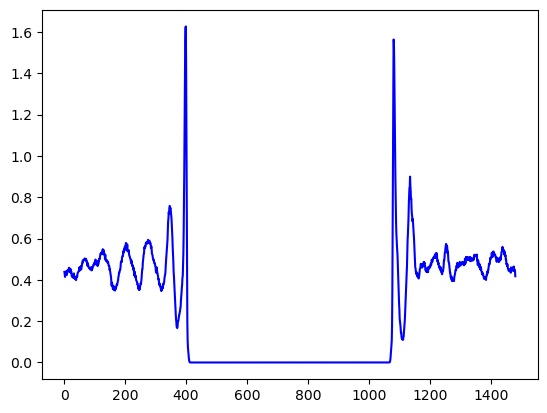

100 B


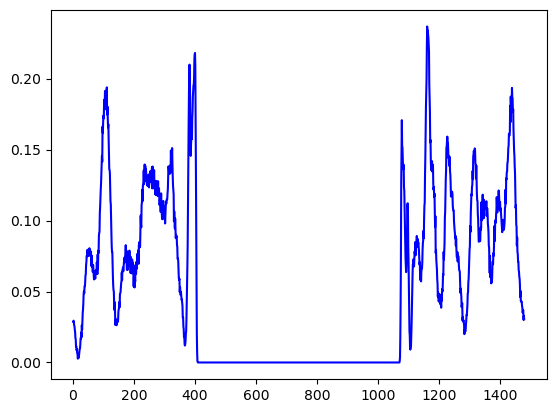

100 C


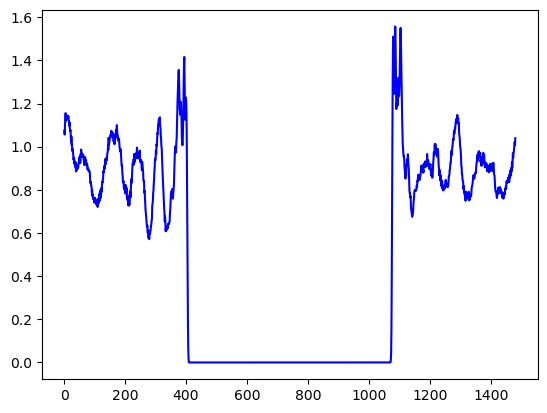

200 A


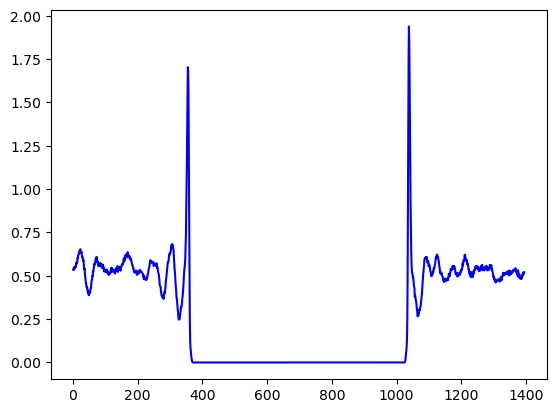

200 B


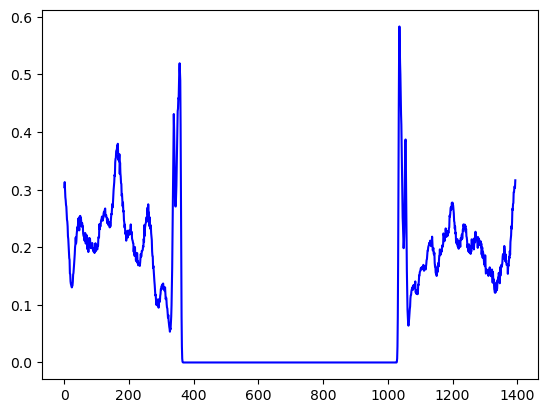

200 C


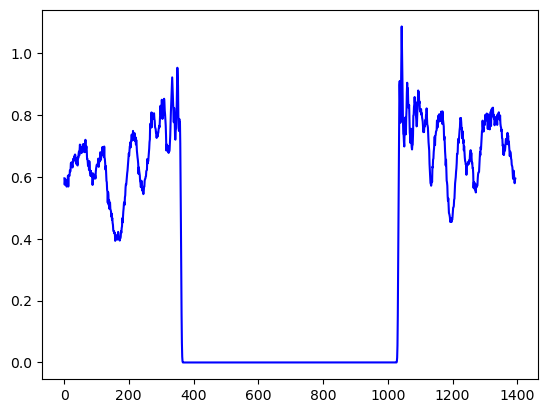

300 A


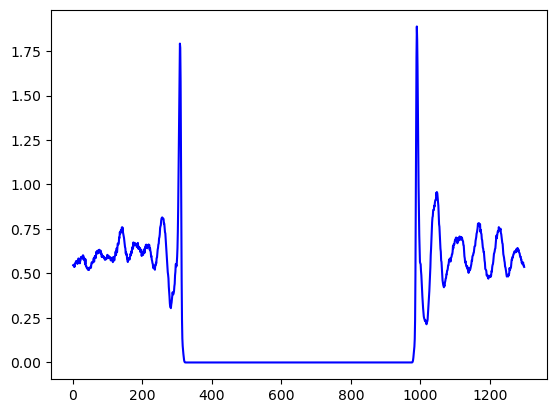

300 B


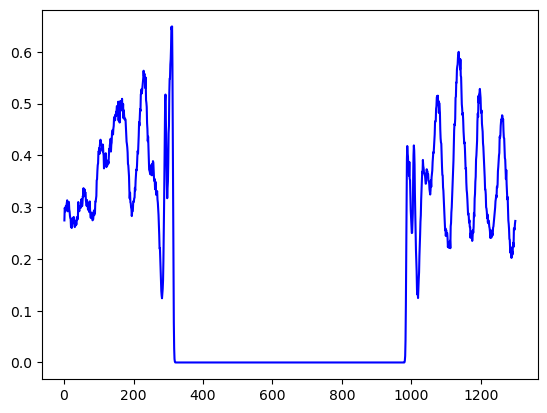

300 C


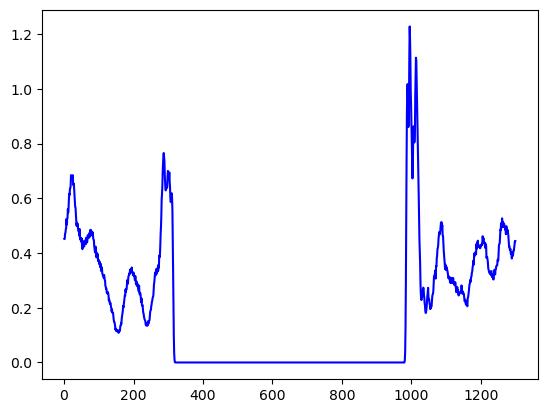

In [33]:
import MDAnalysis
from MDAnalysis.analysis.lineardensity import LinearDensity
import numpy as np
from itertools import count
import matplotlib.pyplot as plt
def density(psf, dcd, segid):
    u = MDAnalysis.Universe(psf, dcd)
    mol = u.select_atoms(segid)
    ldens = LinearDensity(mol, grouping ='atoms', binsize=0.1)
    ldens.run(start=4000,stop=5000)
    D = ldens.results
    x = np.linspace(1,np.size(D['x']['pos']),np.size(D['x']['pos']))
    y = np.linspace(1,np.size(D['y']['pos']),np.size(D['y']['pos']))
    z = np.linspace(1,np.size(D['z']['pos']),np.size(D['z']['pos']))
    #print(x, D['x']['pos'], y, D['y']['pos'], z, D['z']['pos'])
    plt.plot(z, D['z']['pos'],color='b')
    plt.show()
    np.savetxt("Den"+str(con)+str(segid)+'.dat',np.column_stack((z, D['z']['pos'])))
    
    return x, D['x']['pos'], y, D['y']['pos'], z, D['z']['pos']
for con in conrange:
    dcdfile='./DCD/bf_'+str(con)+'/prorun.4.350.dcd'
    psffile='./DCD/bf_'+str(con)+'/sys.psf'
    segids=['A','B','C']
    for segid in segids:
        print(con,segid)
        seg='segid '+segid
        density(psffile,dcdfile,seg)
    

In [1]:
import matplotlib.pyplot as plt
from sympy.physics.vector import *
import math
import MDAnalysis
import numpy as np
import pandas as pd
from numpy.linalg import norm
from numpy import trapz

def plot_Pleg(psf, dcd):
    N = ReferenceFrame('N')
        
    fig = plt.figure(figsize=(10,4))
    
    u = MDAnalysis.Universe(psf, dcd)
    g = u.select_atoms("segid GL0")
    C1 = g.select_atoms("type C and resid 655").positions
    C2 = g.select_atoms("type C and resid 656").positions
    C3 = g.select_atoms("type C and resid 658").positions
    #print(C1,C2,C3)
    C1_2 = C1 - C2
    C3_2 = C3 - C2
    C = np.cross(C1_2,C3_2)
    C_Norm = C/norm(C)
    C_N = np.squeeze(np.asarray(C_Norm))
#     print(np.shape(C_N))
    v = u.select_atoms("resname EIM")
    b = u.select_atoms("resname BF")
    
    binWidth = 0.5
    nBin = int(40/binWidth)
    #Orient_Im = []
        
    grp1 = v.select_atoms("type NA1 NA2 CR1").groupby('resids')
    #print(grp1)
    
    g_p = g.principal_axes()
    
    t=[]
    binIndex = 0
    for ts in u.trajectory[4950:5000]:
        for k, d in grp1.items():
            z_cm = d.center_of_mass()
#             print(z_cm,d,ts)
            zp = z_cm[2]
            #print(zp)
            binIndex = int(zp/binWidth)
            CR = d.select_atoms("name CR1").positions
            NA1 = d.select_atoms("name NA1").positions
            NA2 = d.select_atoms("name NA2").positions
            V_1 = CR - NA1
#             print(np.shape(V_1))
            V_2 = CR - NA2
            V = np.cross(V_1,V_2)
            #print(C,V)
#             print(np.shape(V))
            V_Norm = V/(np.linalg.norm(V))  #unit vector
            gp_Norm = np.array([0,0,1])
#             print(np.shape(V_Norm))
#             print(np.shape(gp_Norm))
            cos_theta1 = (np.dot(V, gp_Norm))/(np.linalg.norm(V)*np.linalg.norm(gp_Norm))
#             print(type(cos_theta1))
            t.append([binIndex, cos_theta1])
#             print(t)
    cos = (sorted(t, key=lambda x:x[0]))    
#     print(cos)
    df = pd.DataFrame(cos, dtype=float)
    df.columns =['binIndex', 'Orient']
    df['P'] = df['Orient'].abs()
#     print(df)
    #gp = df.groupby('binIndex')['Orient'].sum()
    grouped_df = df.groupby("binIndex")
#     print(grouped_df)
    mean_df = grouped_df.mean()
    mean_df = mean_df.reset_index()
#     print(mean_df)
     
    mean_df['Orient'] = mean_df['P'].apply(lambda x: (3.0/2.0)*np.square(x)-(1.0/2.0))
#     print(mean_df)
    mean_df['binIndex'] = mean_df['binIndex'].apply(lambda x: x*binWidth+0.5*binWidth)
    #plt.scatter(mean_df["binIndex"], mean_df["Orient"], label='1')
#     print(mean_df)
    mean_df.plot(kind='line',x='binIndex',y='P', color='red')
    xvals=(mean_df['binIndex'])
    yval =  mean_df['Orient']
    print(yval)
    area = trapz(yval, dx=binWidth)
    print(area)
    plt.ylim(0,1)
    plt.legend()
    plt.title("orientation parameter@"+str(T)+'k,bf='+str(con))
    plt.savefig("str"+str(dT)+'.'+str(con)+'.png',dpi=600)
    plt.show()  

In [2]:
conrange= [0,100,200,300,400]
trange= [350]
dtrange = [60,80]
diranl="./bf4_"
for con in conrange:
    for dT in dtrange:
        irun=1
        print(diranl+str(con)+"/dt="+str(dT)+'/output/'+'sys.psf', diranl+str(con)+ "/dt="+str(dT)+'/output'+'/prorun.'+str(irun)+"."+str(T)+'.dcd')
        plot_Pleg(diranl+str(con)+"/dt="+str(dT)+'/output/'+'sys.psf', diranl+str(con)+"/dt="+str(dT)+'/output'+'/prorun.'+str(irun)+"."+str(T)+'.dcd')

NameError: name 'T' is not defined

In [ ]:
import matplotlib.pyplot as plt
from sympy.physics.vector import *
import math
import MDAnalysis
import numpy as np
import pandas as pd
from numpy.linalg import norm
from numpy import trapz

def plot_Pleg(psf, dcd):
    N = ReferenceFrame('N')
        
    fig = plt.figure(figsize=(10,4))
    
    u = MDAnalysis.Universe(psf, dcd)
    g = u.select_atoms("segid GL0")
    C1 = g.select_atoms("type C and resid 655").positions
    C2 = g.select_atoms("type C and resid 656").positions
    C3 = g.select_atoms("type C and resid 658").positions
    print(C1,C2,C3)
    C1_2 = C1 - C2
    C3_2 = C3 - C2
    C = np.cross(C1_2,C3_2)
    print(C)
    C_Norm = C/norm(C)
    print(C_Norm)
    C_N = np.squeeze(np.asarray(C_Norm))
#     print(np.shape(C_N))
    v = u.select_atoms("resname EIM")
    b = u.select_atoms("resname BF")
    
    binWidth = 0.5
    nBin = int(40/binWidth)
    #Orient_Im = []
        
    grp1 = v.select_atoms("type NA1 NA2 CR1").groupby('resids')
    #print(grp1)
    
    g_p = g.principal_axes()
    
    t=[]
    binIndex = 0
    for ts in u.trajectory[2000:3000]:
        for k, d in grp1.items():
            z_cm = d.center_of_mass()
#             print(z_cm,d,ts)
            zp = z_cm[2]
            #print(zp)
            binIndex = int(zp/binWidth)
            CR = d.select_atoms("name CR1").positions
            NA1 = d.select_atoms("name NA1").positions
            NA2 = d.select_atoms("name NA2").positions
            V_1 = CR - NA1
#             print(np.shape(V_1))
            V_2 = CR - NA2
            V = np.cross(V_1,V_2)
#             print(np.shape(V))
            V_Norm = V/(np.linalg.norm(V))  #unit vector
            gp_Norm = np.array([0,0,1])
#             print(np.shape(V_Norm))
#             print(np.shape(gp_Norm))
            cos_theta1 = (np.dot(V, gp_Norm))/(np.linalg.norm(V)*np.linalg.norm(gp_Norm))
#             print(type(cos_theta1))
            t.append([binIndex, cos_theta1])
#             print(t)
    cos = (sorted(t, key=lambda x:x[0]))    
#     print(cos)
    df = pd.DataFrame(cos, dtype=float)
    df.columns =['binIndex', 'Orient']
    df['P'] = df['Orient'].abs()
#     print(df)
    #gp = df.groupby('binIndex')['Orient'].sum()
    grouped_df = df.groupby("binIndex")
#     print(grouped_df)
    mean_df = grouped_df.mean()
    mean_df = mean_df.reset_index()
#     print(mean_df)
     
    mean_df['Orient'] = mean_df['P'].apply(lambda x: (3.0/2.0)*np.square(x)-(1.0/2.0))
#     print(mean_df)
    mean_df['binIndex'] = mean_df['binIndex'].apply(lambda x: x*binWidth+0.5*binWidth)
    #plt.scatter(mean_df["binIndex"], mean_df["Orient"], label='1')
#     print(mean_df)
    mean_df.plot(kind='line',x='binIndex',y='P', color='red')
    xvals=(mean_df['binIndex'])
    yval =  mean_df['Orient']
    print(yval)
    area = trapz(yval, dx=binWidth)
    print(area)
    plt.ylim(0,1)
    plt.legend()
    plt.title("orientation parameter@"+str(T)+'k,bf='+str(con))
    plt.savefig("str"+str(dT)+'.'+str(con)+'.png',dpi=600)
    plt.show()